In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load the data
data = sio.loadmat('Data/data.mat')

In [ ]:
# get all the faces - 24*21*600
faces = data.get('face')

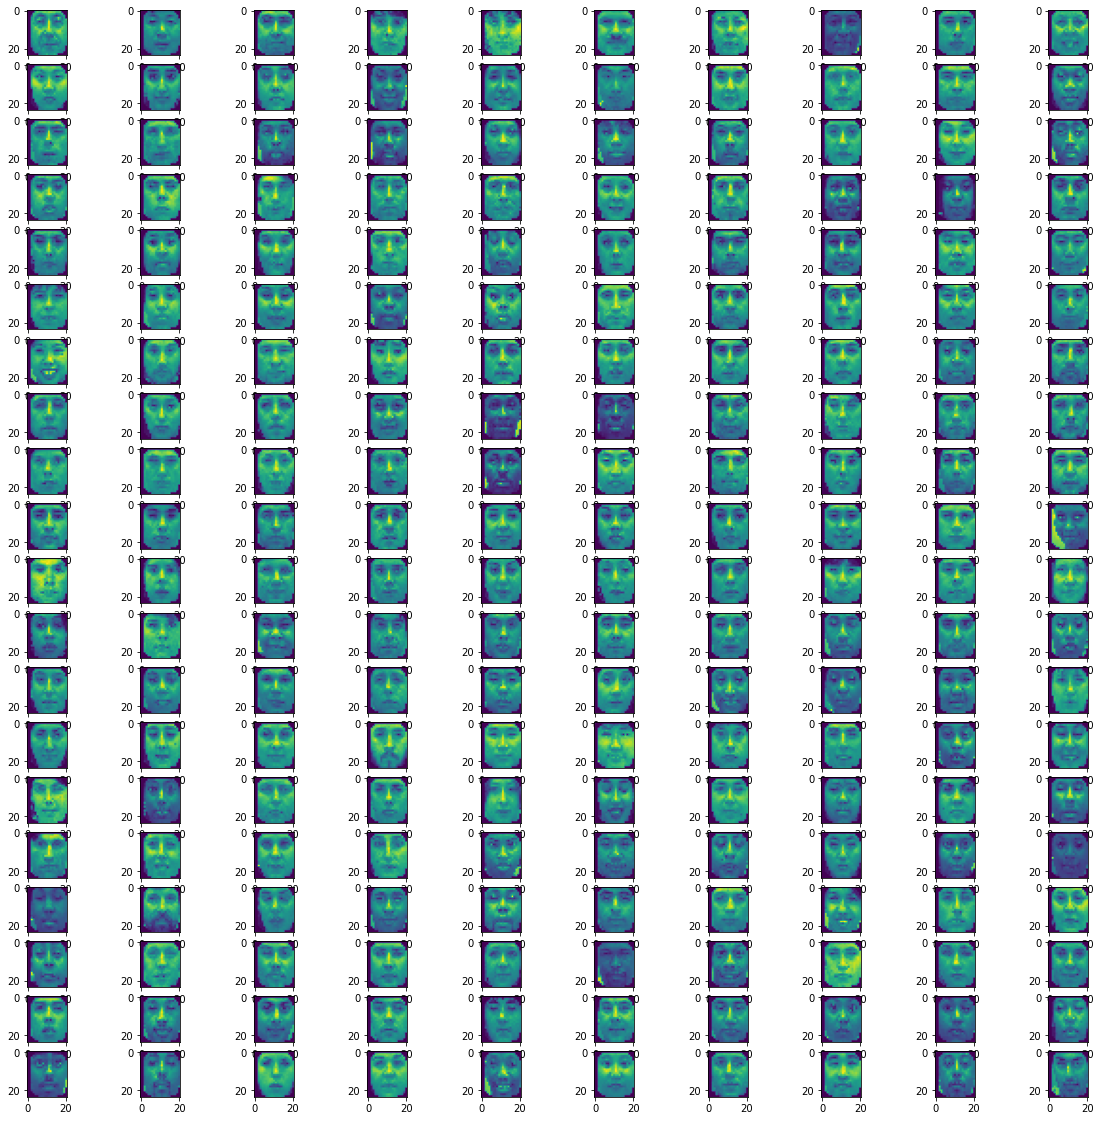

In [ ]:
fig, ax_array = plt.subplots(nrows=20, ncols=10, figsize=(20,20))

# flatten the array of axes, which makes them easier to iterate through and assign
ax_array = ax_array.flatten()

c = 2
# plot the faces
for i, ax in enumerate(ax_array):
    ax.imshow(faces[:,:,c])
    c+=3


# Build up the training and testing data

In [267]:
# init the training and testing datad
total_subjects = 200
training_size = int((2/3)*faces.shape[2])
testing_size = int((1/3)*faces.shape[2])
training_data = np.zeros(shape=(training_size, faces.shape[0]*faces.shape[1]))
testing_data = np.zeros(shape=(testing_size, faces.shape[0]*faces.shape[1]))

In [268]:
c = 1 # counter to pick random sample from either illumination or 
train_index = 0
test_index = 0
for i in range(0, faces.shape[2], 3):
    training_data[train_index] = faces[:,:,i].flatten()
    if c % 2 == 0:
        training_data[train_index+1] = faces[:,:,i+1].flatten()
        testing_data[test_index] = faces[:,:,i+2].flatten()
    else:
        training_data[train_index+1] = faces[:,:,i+2].flatten()
        testing_data[test_index] = faces[:,:,i+1].flatten()
    train_index += 2
    test_index += 1
    c += 1

In [ ]:
# fig, ax_array = plt.subplots(nrows=40, ncols=10, figsize=(20,20))

# # flatten the array of axes, which makes them easier to iterate through and assign
# ax_array = ax_array.flatten()

# # plot the faces
# for i, ax in enumerate(ax_array):
#     ax.imshow(training_data[i].reshape(24,21))

# Compute the Covariance and Mean of each class

In [279]:
mu = []
cov = []
for i in range(0, len(training_data), 2):
    mean = ((training_data[i] + training_data[i+1]) / 2).reshape(1, training_data.shape[1])
    cov1 = np.matmul((training_data[i]-mean).T, training_data[i]-mean)
    cov2 = np.matmul((training_data[i+1]-mean).T, training_data[i+1]-mean)
    noise = 0.24*np.identity(cov1.shape[0])
    cov_ = cov1 + cov2 + noise
    cov.append(cov_)
    mu.append(mean)
    if np.linalg.det(cov_) == 0 or np.linalg.det(cov_) == 0.0:
        print('alert - zero determinant')